# Introducción a la Programación en *Python* en las Ciencias Sociales

Este repositorio de Git muestra cómo utilizar *Python* en el ámbito de las ciencias sociales. El objetivo es demostrar cómo *Python* puede ser una herramienta poderosa en el análisis de datos políticos. A continuación, se presenta una introducción sobre el uso de *Python* y Anaconda en este contexto.

## *Jupyter Notebook* y sus Herramientas

Este repositorio contiene *Jupyter Notebooks*, que son entornos de programación interactivos que permiten combinar código, texto, imágenes, videos y más. Son muy útiles para enseñar programación, ya que permiten explicar conceptos y aplicarlos de manera práctica. Si necesitas más información sobre las herramientas utilizadas en este documento, puedes consultar el [archivo](heramientas.md) que proporciona una lista y descripción detallada de las herramientas utilizadas.

## ¿Qué es *Python*?

*Python* es un lenguaje de programación interpretado, de alto nivel y de propósito general. Fue creado por Guido van Rossum en 1991 y es muy popular en el análisis de datos. **Python** es un lenguaje multiparadigma, lo que significa que admite diferentes estilos de programación, como orientación a objetos, programación imperativa y programación funcional. En el contexto de las ciencias políticas, *Python* puede ser utilizado para procesar y analizar datos políticos de manera eficiente. Se puede emplear para recopilar y organizar datos de encuestas, analizar tendencias electorales, crear gráficos y visualizaciones interactivas, y realizar análisis estadísticos. Aprender *Python* proporciona una habilidad técnica valiosa que se puede aplicar en el campo de estudio y en la carrera profesional, permitiendo ser más creativo en el uso de datos y aprovechar herramientas más poderosas como el *web scraping* o el *machine learning*, que no están presentes en programas tradicionales como Excel o SPSS.

## ¿Qué es Anaconda?

Anaconda es una herramienta útil para trabajar con programas y bibliotecas de análisis de datos en *Python*. Es un conjunto de herramientas diseñado específicamente para el análisis de datos, que proporciona todo lo necesario para trabajar con datos y realizar análisis. En el entorno de Anaconda, se incluyen herramientas populares como *Python* y *Jupyter Notebook*. Además, cuenta con bibliotecas poderosas como Pandas, NumPy y Matplotlib, que permiten manipular y analizar datos, así como realizar web scraping de forma sencilla, como se verá más adelante.

## Importación de Bibliotecas

La importación de bibliotecas es una parte fundamental de la programación en *Python*. Las bibliotecas son conjuntos de funciones y métodos que permiten realizar tareas específicas que no están disponibles en el núcleo de *Python*. Para importar una biblioteca, se utiliza el comando `import` seguido del nombre de la biblioteca. En este repositorio, importaremos todas las bibliotecas necesarias para llevar a cabo los análisis de datos en *Python*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import wbdata
import pycountry
import base64
from IPython.display import Image, display

## Objetivo

El objetivo de este documento es utilizar la biblioteca Pandas para realizar web scraping en la página de Wikipedia del [Índice de Percepción de Corrupción](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index). Además, utilizaremos la biblioteca `wbdata` para descargar datos de la base de datos del Banco Mundial a través de su API. Luego, emplearemos Pandas para limpiar y analizar los datos obtenidos. Finalmente, utilizaremos Matplotlib para visualizar los datos.

**Nota**: Si sigues el enlace del Índice de Percepción de Corrupción, te darás cuenta de que estamos utilizando la página de Wikipedia en lugar de la página oficial de Transparencia Internacional. Esto se debe a que la página de Wikipedia es más fácil de extraer información, ya que la página oficial utiliza JavaScript para cargar los datos, lo que requiere métodos de web scraping más avanzados. Sin embargo, la página de Wikipedia es una copia de la página oficial y contiene los mismos datos.

## Proceso de Análisis de Datos con Python

En esta parte, trabajaremos con la secuencia completa de análisis de datos utilizando Python. Es decir, recolectaremos los datos, los limpiaremos y los analizaremos.

- **Recolección de datos**: Utilizaremos web scraping para obtener los datos de la página web del [Índice de Percepción de Corrupción](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index) y la API del Banco Mundial para recopilar datos de su base de datos.

- **Limpieza de datos**: Utilizaremos Pandas para limpiar y preparar los datos para su posterior análisis.

- **Análisis de datos**: Utilizaremos Matplotlib para analizar y visualizar los datos obtenidos.

El proceso que seguiremos es el siguiente:

In [2]:
def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
graph LR;
    id1[(Recoleccion de datos )] --> id2[(Limpieza de datos)];
    id2 --> id3[(Analisis datos)];
    id3 --> id4[(Interpretacion datos)];
""")


### Recolección de datos

En esta parte, estaremos recolectando los datos de la página web del [Índice de Percepción de Corrupción](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index) utilizando la biblioteca Pandas.

In [3]:
# Parte de web scraping
url = 'https://en.wikipedia.org/wiki/corruption_Perceptions_Index'
html = requests.get(url).content
# Recoleccion de datos de cpi paa 2020-2022
df_list = pd.read_html(html,match='2022')
df_2022 = df_list[-1]
df_2022.drop(columns=df_2022.columns[0], axis=1, inplace=True)

# Repiticion de web scraping para los demas años
# Recoleccion de datos de cpi paa 2010-2019
df_list = pd.read_html(html,match='2014')
df_2019 = df_list[-1]
df_2019.drop(columns=df_2019.columns[0], axis=1, inplace=True)

# Recoleccion de datos de cpi paa 2000-2009
df_list = pd.read_html(html,match='2009')
df_2009 = df_list[-1]
df_2009.drop(columns=df_2009.columns[0], axis=1, inplace=True)

# Recoleccion de datos de cpi paa 1995-1999
df_list = pd.read_html(html,match='1995')
df_1999 = df_list[-1]
df_1999.drop(columns=df_1999.columns[0], axis=1, inplace=True)

# Cambio de nombre de columnas
df_2022.columns = ['country', 'score 2022','change 2022','score 2021','change 2021','score 2020','change 2020']
df_2022.drop_duplicates(subset='country', keep='first', inplace=True)

df_2019.columns = ['country', 'score 2019','change 2019','score 2018','change 2018','score 2017','change 2017',
                   'score 2016','change 2016','score 2015','change 2015','score 2014','change 2014','score 2013',
                   'change 2013','score 2012','change 2012','score 2011','change 2011','score 2010','change 2010']
df_2019.drop_duplicates(subset='country', keep='first', inplace=True)

df_2009.columns = ['country', 'score 2009','change 2009','score 2008','change 2008','score 2007','change 2007',
                   'score 2006','change 2006','score 2005','change 2005','score 2004','change 2004','score 2003',
                   'change 2003','score 2002','change 2002','score 2001','change 2001','score 2000','change 2000']
df_2009.drop_duplicates(subset='country', keep='first', inplace=True)

df_1999.columns = ['country', 'score 1999','change 1999','score 1998','change 1998','score 1997','change 1997',
                   'score 1996','change 1996','score 1995']
df_1999.drop_duplicates(subset='country', keep='first', inplace=True)

df_2022

,country,score 2022,change 2022,score 2021,change 2021,score 2020,change 2020
0,Denmark,90,NaN,88,NaN,88,NaN
1,New Zealand,87,1,88,NaN,88,NaN
2,Finland,87,1,88,2,85,NaN
3,Norway,84,NaN,85,3,84,NaN
4,Singapore,83,1,85,1,85,1
...,...,...,...,...,...,...,...
176,Yemen,16,2,16,2,15,1
177,Venezuela,14,NaN,14,1,15,3
178,Syria,13,NaN,13,NaN,14,NaN
179,South Sudan,13,2,11,1,12,NaN


En la celda anterior, específicamente las primeras 7 líneas de código, vemos el proceso de *scrapping* donde bajamos el HTML de la página de Wikipedia y lo convertimos en un objeto de *pandas*. Luego le cambiamos el nombre a las columnas a nombres más familiares.

#### Unión de DataFrames

En esta parte, estaremos uniendo los DataFrames correspondientes a los años 2012 a 2019 utilizando la biblioteca Pandas. El proceso de unión, también conocido como merge, consiste en combinar dos DataFrames a través de una columna en común. En este caso, la columna en común es el nombre del país. Utilizaremos el método `merge` de Pandas para llevar a cabo esta operación.

A continuación, se muestra un diagrama que ilustra el proceso de unión de los DataFrames:

![Diagrama de unión](https://external-preview.redd.it/CYiNamxaGemGB7lRfW9YeYaP4yX4zIWkGarMThrjmxY.png?auto=webp&s=460be9e41dc46ea8f2c0bd6537aa9f1321e28886)

In [4]:
## Merge all dataframes
df = pd.merge(df_2022, df_2019, how='left', on='country',)
df = pd.merge(df, df_2009, how='left', on='country',)
df = pd.merge(df, df_1999, how='left', on='country',)
df

,country,score 2022,change 2022,score 2021,change 2021,score 2020,change 2020,score 2019,change 2019,score 2018,...,change 2000,score 1999,change 1999,score 1998,change 1998,score 1997,change 1997,score 1996,change 1996,score 1995
0,Denmark,90,NaN,88,NaN,88,NaN,87.0,1.0,88.0,...,1,10,NaN,10,NaN,9.94,1,9.33,NaN,9.32
1,New Zealand,87,1,88,NaN,88,NaN,87.0,NaN,87.0,...,NaN,9.4,1,9.4,NaN,9.23,3,9.43,NaN,9.55
2,Finland,87,1,88,2,85,NaN,86.0,1.0,85.0,...,1,9.4,NaN,9.6,NaN,9.48,2,9.05,NaN,9.12
3,Norway,84,NaN,85,3,84,NaN,84.0,NaN,84.0,...,3,8.9,1,9,1,8.92,1,8.87,4,8.61
4,Singapore,83,1,85,1,85,1,85.0,NaN,85.0,...,1,9.1,NaN,9.1,2,8.66,2,8.8,4,9.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Yemen,16,2,16,2,15,1,15.0,1.0,14.0,...,—,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,Venezuela,14,NaN,14,1,15,3,16.0,2.0,18.0,...,4,2.6,2,2.3,33,2.77,4,2.5,10,2.66
178,Syria,13,NaN,13,NaN,14,NaN,13.0,NaN,13.0,...,—,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,South Sudan,13,2,11,1,12,NaN,12.0,1.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Recolección de datos - Parte 2 utilizando API

En esta parte, estaremos recolectando datos del Banco Mundial utilizando la API de [World Bank Data](https://data.worldbank.org/). Un API es una interfaz de programación de aplicaciones que permite a los desarrolladores acceder a los datos y funciones de una aplicación. Para llevar a cabo esta tarea, utilizaremos la biblioteca `wbdata`.

Para utilizar el API de World Bank Data, necesitaremos proporcionar el código de país ISO 3166-1 alpha-3. Este código es un identificador único para cada país. Para obtener automáticamente los códigos de país, utilizaremos la biblioteca `pycountry`.

Este proceso nos permitirá obtener datos actualizados y relevantes directamente de la base de datos del Banco Mundial para su posterior análisis.

In [5]:
# Conseguir el codigo ISO3 de cada pais
for i in range(len(df)):
    try:
        df.loc[i,'ISO3'] = pycountry.countries.search_fuzzy(df.loc[i,'country'])[0].alpha_3
    except:
        df.loc[i,'ISO3'] = np.nan

# Conseguir indicadores y paises de banco mundial
country = []
for i in df['ISO3']:
    country.append(str(i))

for i in range(len(country)):
    if country[i] == 'nan':
        country[i] = 'WLD'

indicators = {"NY.GDP.PcAP.cD": "GDP per capita (current Us$)", 
              'Gc.DOD.TOTL.GD.Zs': "central government debt, total (% of GDP)", "SP.POP.TOTL": "Population, total"}

# Remover duplicados 
country = list(dict.fromkeys(country))

# obtener datos de banco mundial por medio del API
df_wb = wbdata.get_dataframe(indicators, country=country, convert_date=False)
df_wb = df_wb.reset_index()
df_wb = df_wb.rename(columns={'NY.GDP.PcAP.cD': 'GDP per capita (current Us$)', 
                              'Gc.DOD.TOTL.GD.Zs': "central government debt, total (% of GDP)",
                              'SP.POP.TOTL': 'Population, total'})
df_wb

,country,date,GDP per capita (current Us$),"central government debt, total (% of GDP)","Population, total"
0,Afghanistan,2022,NaN,NaN,41128771.0
1,Afghanistan,2021,363.674087,NaN,40099462.0
2,Afghanistan,2020,516.866797,NaN,38972230.0
3,Afghanistan,2019,500.522981,NaN,37769499.0
4,Afghanistan,2018,502.057099,NaN,36686784.0
...,...,...,...,...,...
11020,Zimbabwe,1964,282.376856,NaN,4310332.0
11021,Zimbabwe,1963,277.532515,NaN,4177931.0
11022,Zimbabwe,1962,275.966139,NaN,4049778.0
11023,Zimbabwe,1961,279.332656,NaN,3925952.0


## Limpiando los datos

En esta parte, estaremos utilizando la biblioteca Pandas para limpiar los datos. El proceso de limpieza de datos implica eliminar y manipular datos para que sean más fáciles de analizar. En este caso, realizaremos las siguientes acciones:

- Eliminaremos las columnas que no son relevantes para nuestro análisis.
- Cambiaremos el nombre de las columnas para que sean más descriptivas y fáciles de entender.

Estas acciones nos ayudarán a obtener un conjunto de datos más limpio y estructurado, lo que facilitará el análisis posterior. Utilizaremos las funciones y métodos proporcionados por Pandas para llevar a cabo estas tareas de limpieza.

In [6]:
# drop unneeded years
for i in df_wb['date']:
    if int(i) < 1995:
        df_wb.drop(df_wb[df_wb['date'] == i].index, inplace=True)
df_wb

,country,date,GDP per capita (current Us$),"central government debt, total (% of GDP)","Population, total"
0,Afghanistan,2022,NaN,NaN,41128771.0
1,Afghanistan,2021,363.674087,NaN,40099462.0
2,Afghanistan,2020,516.866797,NaN,38972230.0
3,Afghanistan,2019,500.522981,NaN,37769499.0
4,Afghanistan,2018,502.057099,NaN,36686784.0
...,...,...,...,...,...
10985,Zimbabwe,1999,585.331799,NaN,11716454.0
10986,Zimbabwe,1998,554.361484,NaN,11548364.0
10987,Zimbabwe,1997,750.683909,NaN,11362401.0
10988,Zimbabwe,1996,765.165124,NaN,11178171.0


### Transformación de datos

En esta parte, estaremos utilizando la biblioteca Pandas para transformar los datos y prepararlos para su análisis. El proceso de transformación implica cambiar la estructura de los datos para que sea más fácil combinarlos con otros conjuntos de datos y tenerlos en un formato adecuado para su análisis.

Realizaremos las siguientes acciones:

- Realizaremos transformaciones en los datos para poder combinarlos con otros conjuntos de datos y crear una base de datos completa con todos los datos necesarios.
- Aplicaremos limpiezas adicionales a los datos para asegurarnos de que estén en un estado consistente y listos para el análisis.

Estas acciones nos permitirán tener una base de datos completa y estructurada que nos facilitará el análisis y la combinación de datos de diferentes fuentes.

A continuación, se muestra una representación gráfica de cómo se realizará la transformación de los datos utilizando la función de transposición:

![Gráfica de transformación](https://4.bp.blogspot.com/-yjiXb3T8_wU/VICabPkT3QI/AAAAAAAAAnU/CF45lJVDzG4/s1600/Capture.JPG)

In [7]:
# Transformarlos en datos de panel
df_cpi = df.set_index('country')
df_cpi = df_cpi.stack().reset_index()
df_cpi = df_cpi.rename(columns={'level_1': 'year', 0: 'score'})

# remover las columnas que no se necesitan
df_cpi = df_cpi[df_cpi['year'].str.contains('score')]

# conseguir el año
df_cpi['year'] = df_cpi['year'].str.replace('score ', '')
df_cpi['year'] = df_cpi['year'].astype(int)

# renombrar las columnas
df_cpi = df_cpi.rename(columns={'level_0': 'country', 'year':'date', 'score': 'CPI'})
df_cpi

# cambiar a 0 los valores '-' y convertir a float
for i in df_cpi['CPI']:
    if i == '—':
        df_cpi['CPI'].replace(i, np.nan, inplace=True)
df_cpi['CPI'] = df_cpi['CPI'].astype(float)

# turn date into int
df_wb['date'] = df_wb['date'].astype(int)
df_cpi['date'] = df_cpi['date'].astype(int)

# Merge cpi and wb data
df = pd.merge(df_cpi, df_wb, how='left', on=['country','date'])

# add freedom bins
df['freedom'] = pd.cut(
                        df['CPI'], bins=[-1, 50, 60, 70, 80, 90, 100], 
                        labels=['1. Very Low', '2. Low', '3. Moderate', '4. High', '5. Very High', '6. Free']
                        )
df

,country,date,CPI,GDP per capita (current Us$),"central government debt, total (% of GDP)","Population, total",freedom
0,Denmark,2022,90.0,66983.132002,NaN,5903037.0,5. Very High
1,Denmark,2021,88.0,68007.756673,NaN,5856733.0,5. Very High
2,Denmark,2020,88.0,60915.424400,NaN,5831404.0,5. Very High
3,Denmark,2019,87.0,59592.980689,NaN,5814422.0,5. Very High
4,Denmark,2018,88.0,61591.928870,NaN,5793636.0,5. Very High
...,...,...,...,...,...,...,...
4092,Somalia,2004,NaN,NaN,NaN,10117354.0,NaN
4093,Somalia,2003,NaN,NaN,NaN,9758281.0,NaN
4094,Somalia,2002,NaN,NaN,NaN,9411103.0,NaN
4095,Somalia,2001,NaN,NaN,NaN,9070747.0,NaN


## Análisis de datos

En esta parte, estaremos realizando el análisis de los datos. Utilizaremos la biblioteca `matplotlib` para crear visualizaciones y gráficos que nos ayudarán a comprender y analizar los datos de manera más efectiva.

Comenzaremos generando un histograma para el Índice de Percepción de Corrupción del año 2022. El histograma nos permitirá visualizar la distribución de los valores del índice y obtener información sobre la tendencia central y la dispersión de los datos. Utilizaremos las funciones y métodos proporcionados por `matplotlib` para crear esta visualización.

El histograma nos ayudará a comprender mejor la distribución de la percepción de la corrupción y nos permitirá identificar posibles patrones o tendencias en los datos.

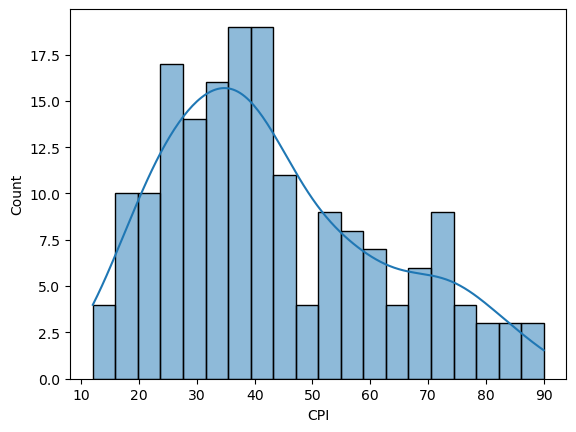

In [8]:
# histogram of CPI after for only 2020 with sns
df_2022 = df[df['date'] == 2022]
df_2022 = df_2022.reset_index(drop=True)
plt = sns.histplot(data=df_2022, x='CPI', bins=20, kde=True)

### Gráfica del CPI de España

En esta parte, estaremos graficando el Índice de Percepción de Corrupción (CPI, por sus siglas en inglés) de España. Analizaremos cómo ha cambiado el CPI de España a lo largo de los años. Será interesante observar una notable alza alrededor del año 2009, lo cual se debe a un cambio en la metodología utilizada para calcular el índice.

Utilizaremos la biblioteca `matplotlib` para crear la gráfica que represente la evolución del CPI de España a lo largo del tiempo. Esta gráfica nos permitirá visualizar los cambios en la percepción de la corrupción en España y comprender mejor cómo ha fluctuado a lo largo de los años.

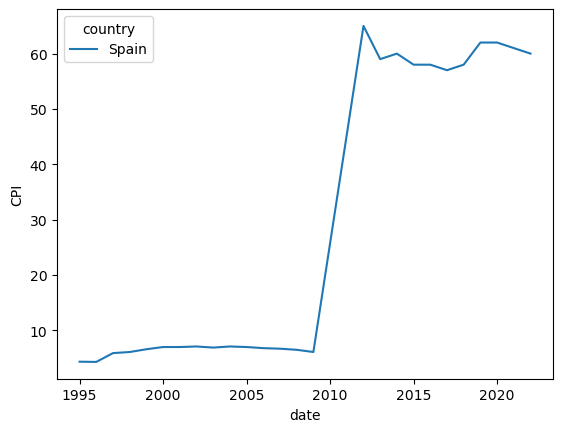

In [9]:
# graph spain cpi 
df_spain = df[df['country'] == 'Spain']
df_spain = df_spain.sort_values(by='date')
df_spain = df_spain.reset_index(drop=True)
plt = sns.lineplot(data=df_spain, x='date', y='CPI', hue='country')

In [10]:
# discriptive statistics the period 2012-2022
df_2012_2022 = df_spain[df_spain['date'] >= 2012]
df_2012_2022 = df_2012_2022.reset_index(drop=True)
df_2012_2022.describe()


,date,CPI,GDP per capita (current Us$),"central government debt, total (% of GDP)","Population, total"
count,11.000000,11.000000,11.000000,10.000000,1.100000e+01
mean,2017.000000,60.000000,28524.110825,109.139300,4.688410e+07
std,3.316625,2.366432,1524.649349,18.255365,4.244250e+05
min,2012.000000,57.000000,25754.361029,77.805067,4.644483e+07
25%,2014.500000,58.000000,27572.498402,105.439848,4.653865e+07
50%,2017.000000,60.000000,29077.182056,107.033613,4.677306e+07
75%,2019.500000,61.500000,29547.584866,111.031603,4.725025e+07
max,2022.000000,65.000000,30379.721113,140.396136,4.761503e+07


## conclusiones
En este cuaderno de Jupyter, hemos demostrado cómo Python puede ser una herramienta poderosa en el campo de la ciencia política. A través del uso de bibliotecas como Pandas, wbdata y Matplotlib, hemos llevado a cabo diversas tareas, desde la recolección de datos de fuentes web y APIs hasta la limpieza, transformación y análisis de los mismos.

En cuanto a la recolección de datos, hemos utilizado técnicas de web scraping para obtener información del Índice de Percepción de Corrupción de la página de Wikipedia, así como del Banco Mundial a través de su API. Esto nos ha permitido trabajar con datos actualizados y relevantes para nuestros análisis.

Además, hemos realizado limpieza y transformación de datos para asegurarnos de que estén en un formato adecuado y sean más fáciles de analizar. Hemos unido DataFrames, realizado cambios en la estructura de los datos y creado una base de datos completa que nos ha permitido llevar a cabo un análisis más profundo.

En cuanto al análisis de datos, hemos utilizado la biblioteca Matplotlib para crear visualizaciones como histogramas y gráficas de la evolución del Índice de Percepción de Corrupción en España a lo largo de los años. Estas visualizaciones nos han proporcionado información valiosa sobre las tendencias y cambios en la percepción de la corrupción en el país.

La importancia de Python en la ciencia política radica en su capacidad para facilitar el procesamiento, análisis y visualización de datos. Python ofrece una amplia gama de bibliotecas especializadas en análisis de datos, lo que permite a los investigadores y profesionales de la ciencia política realizar análisis más rigurosos y basados en evidencia.

Python permite realizar tareas complejas de manera eficiente, lo que ahorra tiempo y recursos en comparación con métodos tradicionales. Además, su sintaxis clara y legible hace que sea más accesible para aquellos que no tienen una formación técnica exhaustiva.

En resumen, Python se ha convertido en una herramienta indispensable en el campo de la ciencia política debido a su capacidad para manejar grandes conjuntos de datos, realizar análisis sofisticados y visualizar resultados de manera efectiva. Su versatilidad y comunidad activa de desarrolladores continúan impulsando la innovación en el análisis de datos en el ámbito político, brindando a los profesionales las herramientas necesarias para tomar decisiones informadas y promover la transparencia y la rendición de cuentas en la sociedad.